In [165]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import scipy.stats as stats


In [166]:
file_path = "ufo_sightings_scrubbed.csv"
ufo_file = pd.read_csv(file_path)
file_path2 = "acs2017_census_tract_data.csv"
census_data = pd.read_csv(file_path2)
ufo_file.head()
file_path3 = "UFO_Sighting_State_Population_data.csv"
combined_ufo_state_data = pd.read_csv(file_path3)


In [167]:
cities = ufo_file[ufo_file['country'] == 'us']
cities.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333


In [168]:
city_sightings = cities['city'].value_counts()
city_sightings_df = pd.DataFrame(city_sightings)
city_sightings_df.head(20)

,city
seattle,524
phoenix,454
portland,373
las vegas,367
los angeles,352
san diego,338
houston,297
chicago,264
tucson,241
miami,239


In [169]:
state_sightings = cities['state'].value_counts()
state_sightings_df = pd.DataFrame(state_sightings)
state_sightings_df.head()

,state
ca,8912
wa,3966
fl,3835
tx,3447
ny,2980


In [170]:
census_data.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [171]:
census_data.groupby('State').head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
1181,2013000100,Alaska,Aleutians East Borough,3338,2049,1289,9.7,15.5,4.8,37.4,...,59.2,3.3,5.3,5.1,2405,70.9,21.0,8.1,0.1,2.4
1182,2016000100,Alaska,Aleutians West Census Area,975,627,348,9.9,21.0,2.7,50.9,...,36.2,10.6,2.3,6.9,555,40.5,56.0,3.4,0.0,3.5
1183,2016000200,Alaska,Aleutians West Census Area,4809,2912,1897,14.2,25.6,5.5,3.5,...,42.6,1.7,0.4,8.0,3406,86.1,10.5,3.3,0.0,1.6
1184,2020000101,Alaska,Anchorage Municipality,5514,2954,2560,4.1,81.0,0.1,4.4,...,1.8,2.1,2.6,29.8,2760,69.3,25.5,5.1,0.0,9.4
1185,2020000102,Alaska,Anchorage Municipality,5198,2428,2770,3.7,78.9,3.2,1.9,...,0.0,0.4,3.7,28.2,2619,76.4,16.6,7.1,0.0,4.0


In [172]:
census_state_population = census_data[['State', 'TotalPop']]
census_state_population.head()

,State,TotalPop
0,Alabama,1845
1,Alabama,2172
2,Alabama,3385
3,Alabama,4267
4,Alabama,9965


In [173]:
census_state_population_sum = census_state_population.groupby(["State"]).sum()
census_state_population_sum.head()

,TotalPop
State,
Alabama,4850771
Alaska,738565
Arizona,6809946
Arkansas,2977944
California,38982847


In [174]:
combined_ufo_state_data.head()

,State,TotalPop,UFO Sightings
0,Alabama,4850771,642
1,Alaska,738565,319
2,Arizona,6809946,2414
3,Arkansas,2977944,588
4,California,38982847,8912


In [175]:
combined_ufo_state_data_df = combined_ufo_state_data[['State','TotalPop','UFO Sightings']]
combined_ufo_state_data_df.head()

,State,TotalPop,UFO Sightings
0,Alabama,4850771,642
1,Alaska,738565,319
2,Arizona,6809946,2414
3,Arkansas,2977944,588
4,California,38982847,8912


In [176]:
sorted_combined_ufo_state_data_df = combined_ufo_state_data_df.sort_values('TotalPop')
sorted_combined_ufo_state_data_df.head()

,State,TotalPop,UFO Sightings
51,Wyoming,583200,175
46,Vermont,624636,260
8,District of Columbia,672391,7
1,Alaska,738565,319
34,North Dakota,745475,129


In [177]:
sorted_combined_ufo_state_data_df['Sightings per Pop'] = sorted_combined_ufo_state_data_df['UFO Sightings'] / sorted_combined_ufo_state_data_df['TotalPop'] 
sorted_combined_ufo_state_data_df['Sightings per Pop * 10K'] = sorted_combined_ufo_state_data_df['Sightings per Pop'] * 10000
sorted_combined_ufo_state_data_df.head()

,State,TotalPop,UFO Sightings,Sightings per Pop,Sightings per Pop * 10K
51,Wyoming,583200,175,0.000300,3.000686
46,Vermont,624636,260,0.000416,4.162424
8,District of Columbia,672391,7,0.000010,0.104106
1,Alaska,738565,319,0.000432,4.319187
34,North Dakota,745475,129,0.000173,1.730440


In [178]:
sorted_combined_ufo_state_data_df.sort_values('Sightings per Pop * 10K').head()

,State,TotalPop,UFO Sightings,Sightings per Pop,Sightings per Pop * 10K
39,Puerto Rico,3468963,25,0.000007,0.072068
8,District of Columbia,672391,7,0.000010,0.104106
18,Louisiana,4663461,558,0.000120,1.196536
10,Georgia,10201635,1255,0.000123,1.230195
24,Mississippi,2986220,375,0.000126,1.255768


In [179]:
sorted_combined_ufo_state_data_df.sort_values('Sightings per Pop * 10K', ascending=False).head()

,State,TotalPop,UFO Sightings,Sightings per Pop,Sightings per Pop * 10K
48,Washington,7169967,3966,0.000553,5.531406
26,Montana,1029862,478,0.000464,4.641399
37,Oregon,4025127,1747,0.000434,4.340236
1,Alaska,738565,319,0.000432,4.319187
19,Maine,1330158,558,0.000419,4.194990


In [180]:
size_classification = [0, 4000000, 8000000, 40000000]
size_labels = ["Small", "Medium", "Large"]
sorted_combined_ufo_state_data_df['Size Classification'] = pd.cut(sorted_combined_ufo_state_data_df['TotalPop'], size_classification, labels=size_labels)

In [181]:
sorted_combined_ufo_state_data_df

,State,TotalPop,UFO Sightings,Sightings per Pop,Sightings per Pop * 10K,Size Classification
51,Wyoming,583200,175,0.000300,3.000686,Small
46,Vermont,624636,260,0.000416,4.162424,Small
8,District of Columbia,672391,7,0.000010,0.104106,Small
1,Alaska,738565,319,0.000432,4.319187,Small
34,North Dakota,745475,129,0.000173,1.730440,Small
42,South Dakota,855444,183,0.000214,2.139240,Small
7,Delaware,943732,166,0.000176,1.758974,Small
26,Montana,1029862,478,0.000464,4.641399,Small
40,Rhode Island,1056138,228,0.000216,2.158809,Small
19,Maine,1330158,558,0.000419,4.194990,Small


In [182]:
size_group = sorted_combined_ufo_state_data_df.groupby('Size Classification')
size_counts = size_group['Size Classification'].count()
size_counts

Size Classification
Small     25
Medium    15
Large     12
Name: Size Classification, dtype: int64

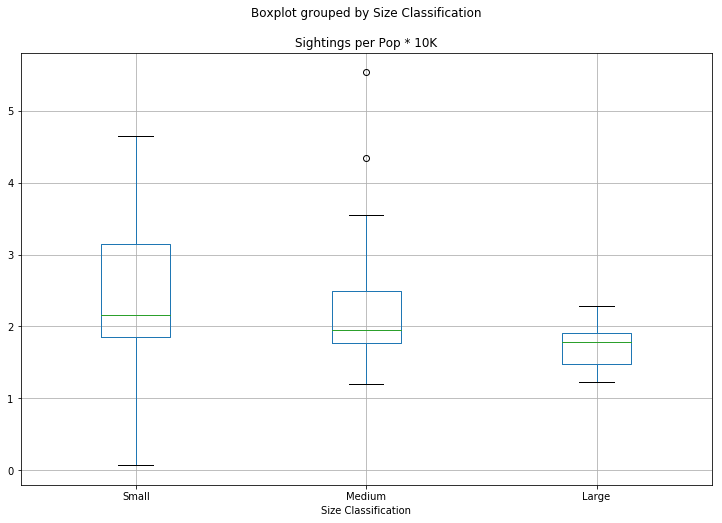

In [183]:
sorted_combined_ufo_state_data_df['TotalPop'].astype('int')
sorted_combined_ufo_state_data_df.boxplot('Sightings per Pop * 10K',by='Size Classification', figsize=(12, 8))

In [184]:
group1 = sorted_combined_ufo_state_data_df[sorted_combined_ufo_state_data_df['Size Classification'] == 'Small']['Sightings per Pop * 10K']
group2 = sorted_combined_ufo_state_data_df[sorted_combined_ufo_state_data_df['Size Classification'] == 'Medium']['Sightings per Pop * 10K']
group3 = sorted_combined_ufo_state_data_df[sorted_combined_ufo_state_data_df['Size Classification'] == 'Large']['Sightings per Pop * 10K']


In [185]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.2523677237676756, pvalue=0.11592965545049268)